<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

## Load dataset

In [3]:
df = pd.read_csv('patient_dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Periksa kelengkapan dataset dengan melihat metadatanya menggunakan method info().

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 8 feature:

- Pregnancies

- Glucose

- BooldPressure

- SkinThickness

- Insulin

- BMI

- DiabetesPedigreeFunction

- Age

dan satu label, yakni Outcome:

- Label 0 = tidak berpotensi menderita diabetes

- Label 1 = berpotensi menderita diabetes

## Data Exploration

**Pisahkan X dan Y dari dataset**

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

In [5]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [6]:
print(X, '\n')
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1

**Splitting Data**

Split data menjadi:

training set (X_train, y_train)
test set (X_test, y_test)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Modeling

In [8]:
model_default = DecisionTreeClassifier()
model_default.fit(X_train, Y_train)

model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4,
                       random_state=25)

##Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

In [9]:
y_pred_train_default = model_default.predict(X_train)
y_pred_test_default = model_default.predict(X_test)

print("Train Accuracy : ", metrics.accuracy_score(Y_train, y_pred_train_default))
print("Test Precission : ", metrics.accuracy_score(Y_test, y_pred_test_default))
print("Test Recall : ", metrics.recall_score(Y_test, y_pred_test_default), '\n')


print("Train Accuracy : ", metrics.accuracy_score(Y_train, y_pred_train_default))
print("Test Precission : ", metrics.accuracy_score(Y_test, y_pred_test_default))
print("Test Recall : ", metrics.recall_score(Y_test, y_pred_test_default))


Train Accuracy :  1.0
Test Precission :  0.7662337662337663
Test Recall :  0.7272727272727273 

Train Accuracy :  1.0
Test Precission :  0.7662337662337663
Test Recall :  0.7272727272727273


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

In [10]:
y_pred_train = model_DT.predict(X_train)
y_pred_test = model_DT.predict(X_test)

print("Train Accuracy : ", metrics.accuracy_score(Y_train, y_pred_train))
print("Test Precission : ", metrics.accuracy_score(Y_test, y_pred_test))
print("Test Recall : ", metrics.recall_score(Y_test, y_pred_test), '\n')

print("Train Accuracy : ", metrics.accuracy_score(Y_train, y_pred_train))
print("Test Precission : ", metrics.accuracy_score(Y_test, y_pred_test))
print("Test Recall : ", metrics.recall_score(Y_test, y_pred_test))



Train Accuracy :  0.7719869706840391
Test Precission :  0.7727272727272727
Test Recall :  0.5818181818181818 

Train Accuracy :  0.7719869706840391
Test Precission :  0.7727272727272727
Test Recall :  0.5818181818181818


**Generate Classification Report**

In [11]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print ('Classification Report Model dengan Hyperparameter Default :\n')
print(classification_report(Y_test, y_pred_test, target_names=nama_label))

print ('\n\nClassification Report Model dengan Hyperparameter Tuning :\n')
print(classification_report(Y_test, y_pred_test, target_names=nama_label))


Classification Report Model dengan Hyperparameter Default :

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification Report Model dengan Hyperparameter Tuning :

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.


##Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

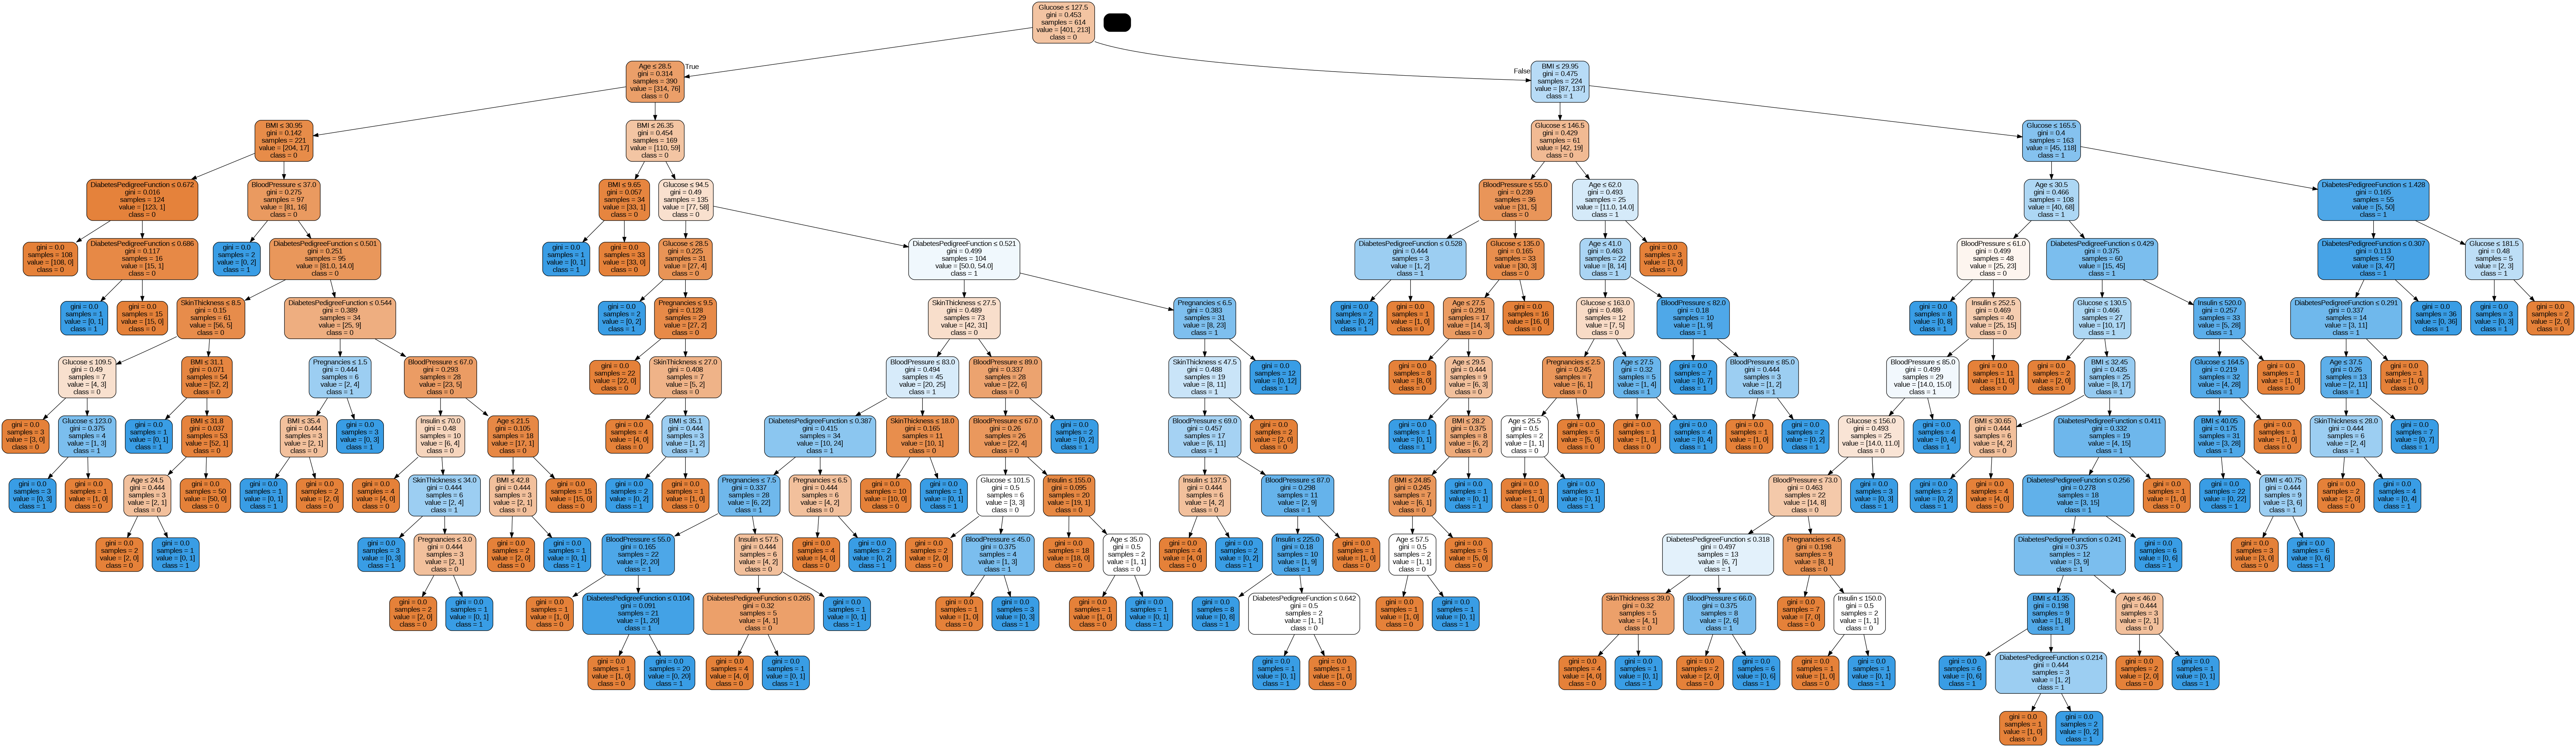

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()
export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_default.png')
Image(graph.create_png())

**Tree Model dengan Tuning Hyperparameter**

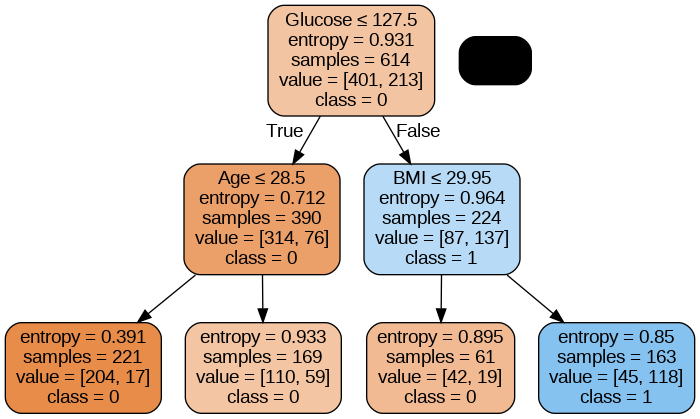

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_tuning.png')
Image(graph.create_png())

**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

Feature: Pregnancies Score: 0.0 %


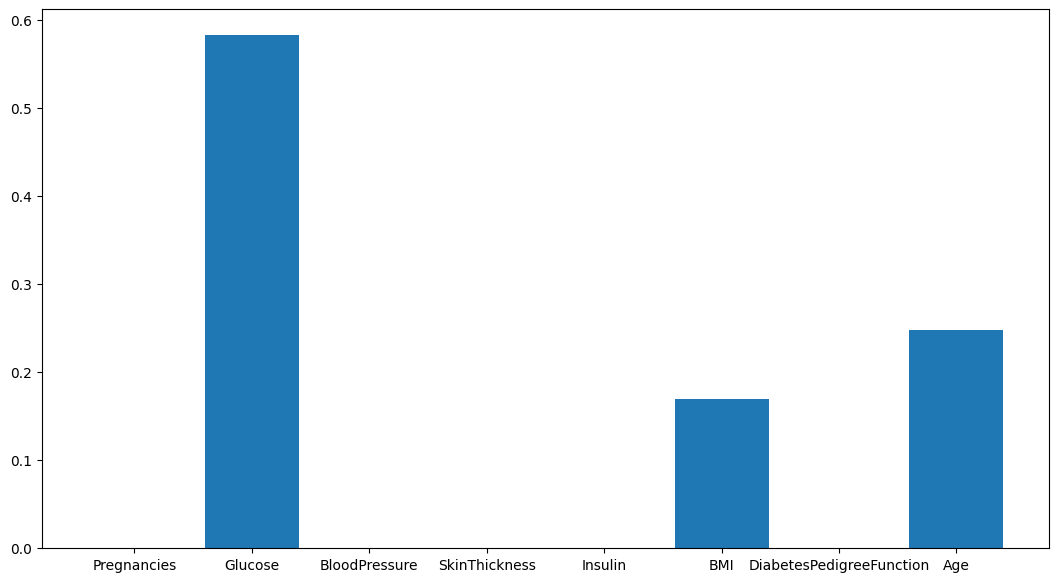

Feature: Glucose Score: 0.583147865932927 %


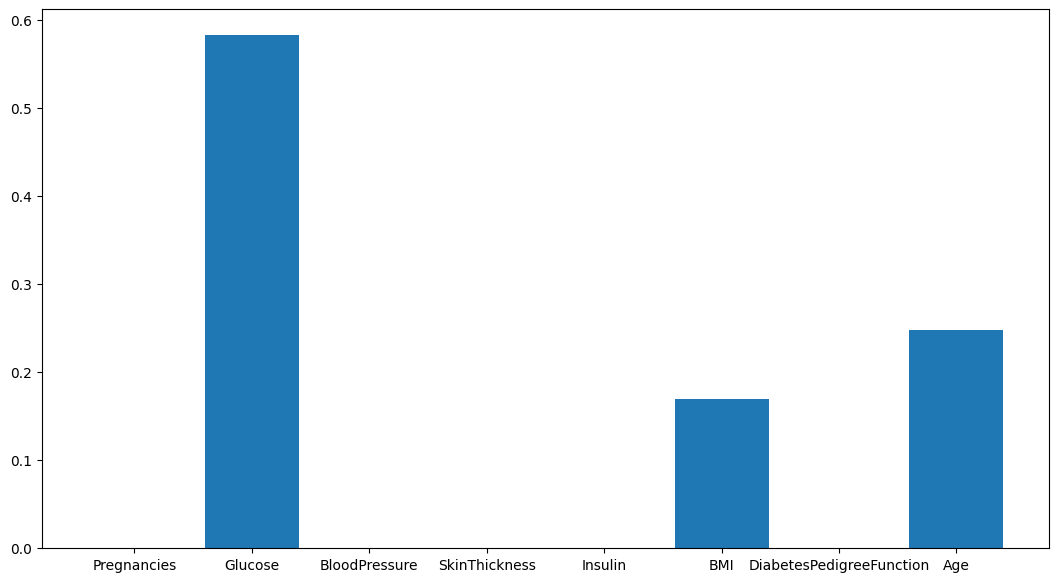

Feature: BloodPressure Score: 0.0 %


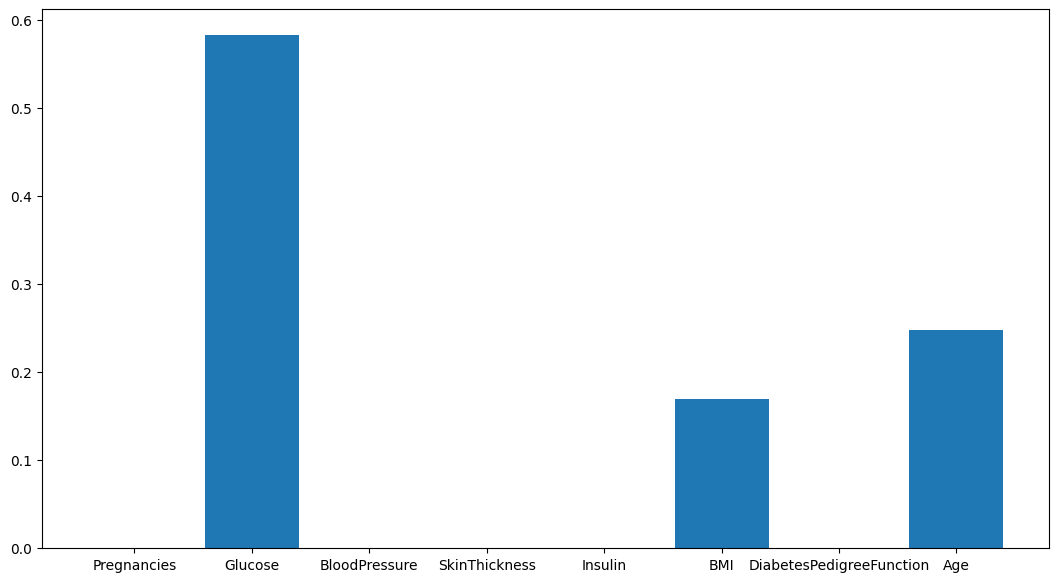

Feature: SkinThickness Score: 0.0 %


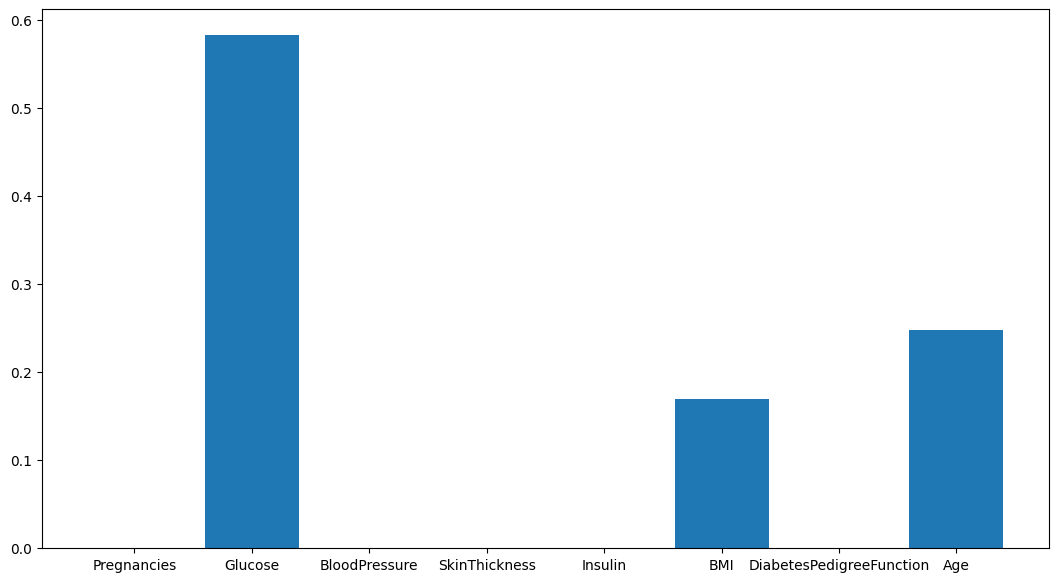

Feature: Insulin Score: 0.0 %


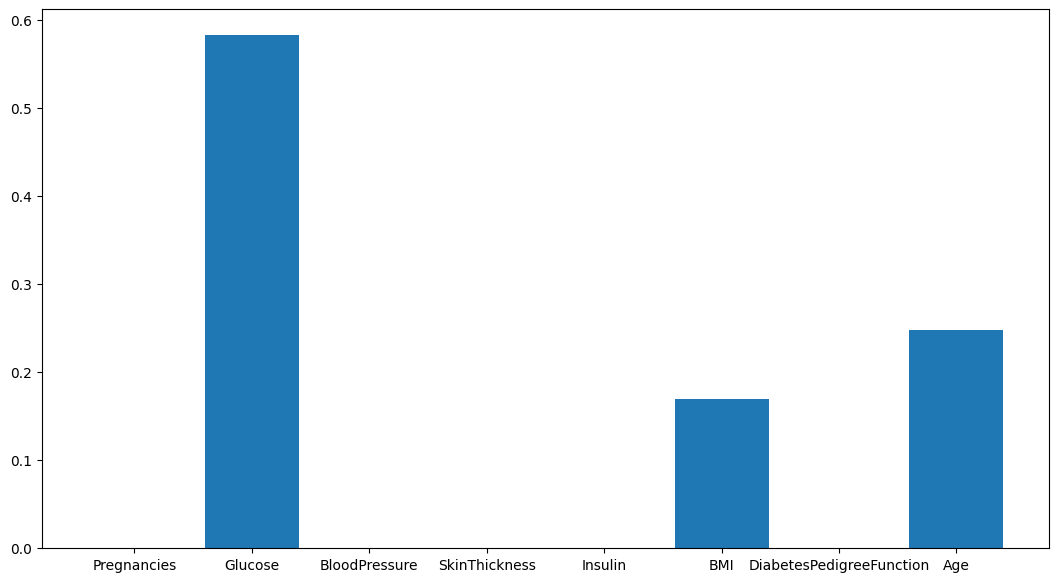

Feature: BMI Score: 0.16908308143089745 %


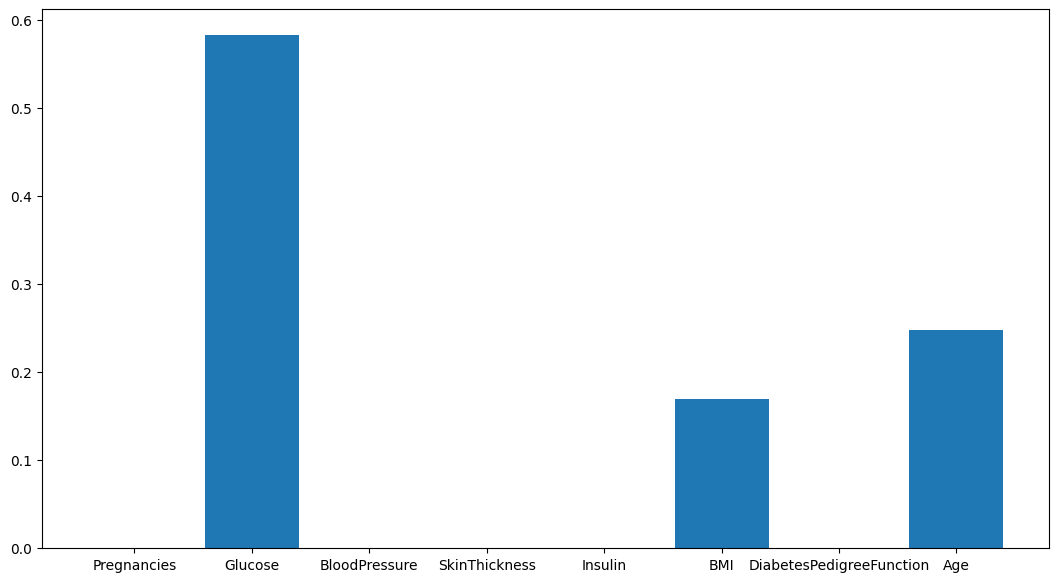

Feature: DiabetesPedigreeFunction Score: 0.0 %


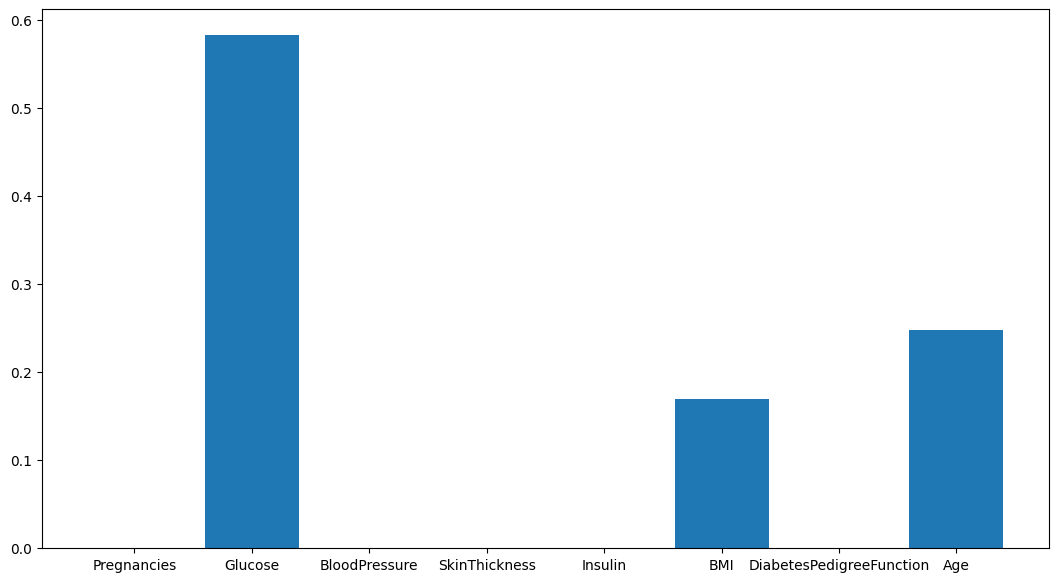

Feature: Age Score: 0.24776905263617552 %


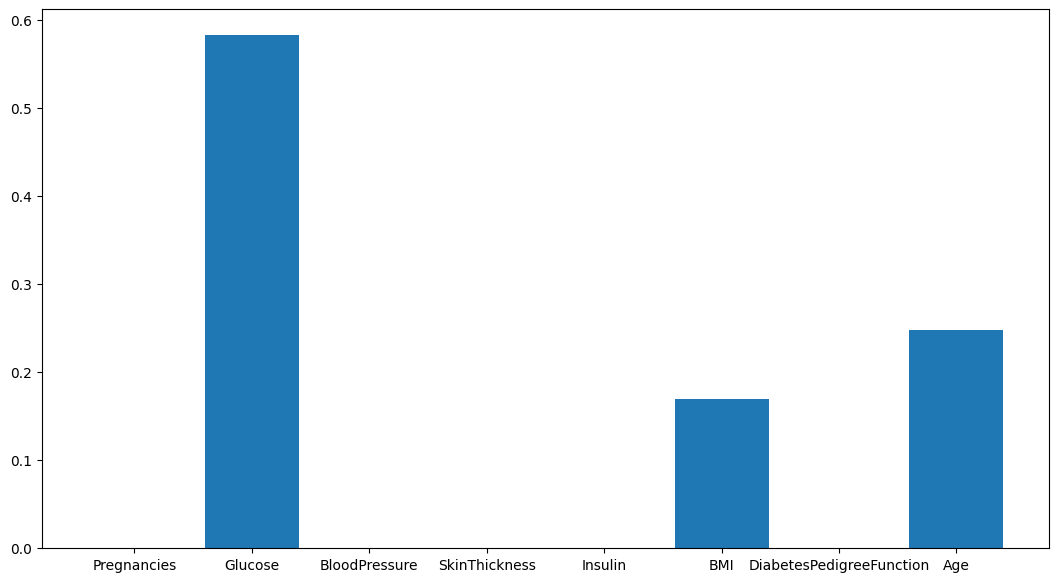

In [14]:
importances = model_DT.feature_importances_

for i,v in enumerate(importances):
  print('Feature:',feature_cols[i], 'Score:', v, '%')

  plt.figure(figsize=(13,7))
  plt.bar([x for x in feature_cols], importances)
  plt.show()

##Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model

In [15]:
Pregnancies = float(input('Input Pregnancies =  '))
Glucose = float(input('Input Glucose =  '))
BloodPressure = float(input('Input BloodPressure =  '))
SkinThickness = float(input('Input SkinThickness =  '))
Insulin = float(input('Input Insulin =  '))
BMI = float(input('Input BMI =  '))
DiabetesPedigreeFunction = float(input('Input DiabetesPedigreeFunction =  '))
Age = float(input('Input Age =  '))
data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)
if hasil_prediksi == 0:
  print('\nTidak berpotensi menderita diabetes!')
else:
  print('\nBerpotensi menderita diabetes!')

Input Pregnancies =  10
Input Glucose =  20
Input BloodPressure =  30
Input SkinThickness =  40
Input Insulin =  50
Input BMI =  10
Input DiabetesPedigreeFunction =  20
Input Age =  30

Tidak berpotensi menderita diabetes!


<ipython-input-15-037187e332df>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi = int(hasil_prediksi)


In [ ]:
Pregnancies = float(input('Input Pregnancies =  '))
Glucose = float(input('Input Glucose =  '))
BloodPressure = float(input('Input BloodPressure =  '))
SkinThickness = float(input('Input SkinThickness =  '))
Insulin = float(input('Input Insulin =  '))
BMI = float(input('Input BMI =  '))